<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Acquire-and-Prep-Titanic-Data" data-toc-modified-id="Acquire-and-Prep-Titanic-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Acquire and Prep Titanic Data</a></span></li><li><span><a href="#Explore-Variable-Relationships-to-Find-Features" data-toc-modified-id="Explore-Variable-Relationships-to-Find-Features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Explore Variable Relationships to Find Features</a></span></li><li><span><a href="#Split-in-and-X-and-y-DataFrames" data-toc-modified-id="Split-in-and-X-and-y-DataFrames-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Split in and X and y DataFrames</a></span></li><li><span><a href="#Baseline-and-First-Logit-Model" data-toc-modified-id="Baseline-and-First-Logit-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Baseline and First Logit Model</a></span><ul class="toc-item"><li><span><a href="#Evaluate-First-Logit-Model" data-toc-modified-id="Evaluate-First-Logit-Model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Evaluate First Logit Model</a></span></li><li><span><a href="#I-have-already-beat-my-baseline-by-almost-20%." data-toc-modified-id="I-have-already-beat-my-baseline-by-almost-20%.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>I have already beat my baseline by almost 20%.</a></span></li></ul></li><li><span><a href="#Use-Model-with-Validate-Dataset" data-toc-modified-id="Use-Model-with-Validate-Dataset-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Use Model with Validate Dataset</a></span><ul class="toc-item"><li><span><a href="#The-model-is-performing-better-on-the-validate-dataset" data-toc-modified-id="The-model-is-performing-better-on-the-validate-dataset-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>The model is performing better on the validate dataset</a></span></li></ul></li><li><span><a href="#Use-my-model-with-the-Test-dataset" data-toc-modified-id="Use-my-model-with-the-Test-dataset-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Use my model with the Test dataset</a></span><ul class="toc-item"><li><span><a href="#The-model-is-the-same-for-accuracy,-but-it-is-missing-more-of-our-positives-for-survived-as-we-can-see-from-the-Recall-score-down-to-65%." data-toc-modified-id="The-model-is-the-same-for-accuracy,-but-it-is-missing-more-of-our-positives-for-survived-as-we-can-see-from-the-Recall-score-down-to-65%.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>The model is the same for accuracy, but it is missing more of our positives for <code>survived</code> as we can see from the Recall score down to 65%.</a></span></li></ul></li></ul></div>

In [43]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=16)

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix

import statsmodels.formula.api as smf
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from acquire_walkthrough import get_titanic_data, get_iris_data
from prepare_walkthrough import prep_iris, prep_titanic

## Acquire and Prep Titanic Data

In [44]:
df = get_titanic_data()

In [45]:
df['is_female'] = df.sex.map({'female': 1, 'male': 0})

In [46]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,is_female
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0,1
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0,1
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1,0


In [47]:
scaler, ohe, train, test = prep_titanic(df)
train, validate = train_test_split(train, random_state=123, train_size=.75)

In [48]:
train.shape

(501, 16)

In [49]:
validate.shape

(167, 16)

In [50]:
test.shape

(223, 16)

In [51]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,is_female,C,Q,S
669,669,1,1,female,0.389113,1,0,0.101497,S,First,Southampton,0,1,0.0,0.0,1.0
54,54,0,1,male,0.877684,0,1,0.120975,C,First,Cherbourg,0,0,1.0,0.0,0.0
16,16,0,3,male,0.021473,4,1,0.056848,Q,Third,Queenstown,0,0,0.0,1.0,0.0
533,533,1,3,female,0.389113,0,2,0.043640,C,Third,Cherbourg,0,1,1.0,0.0,0.0
125,125,1,3,male,0.157380,1,0,0.021942,C,Third,Cherbourg,0,0,1.0,0.0,0.0


## Explore Variable Relationships to Find Features

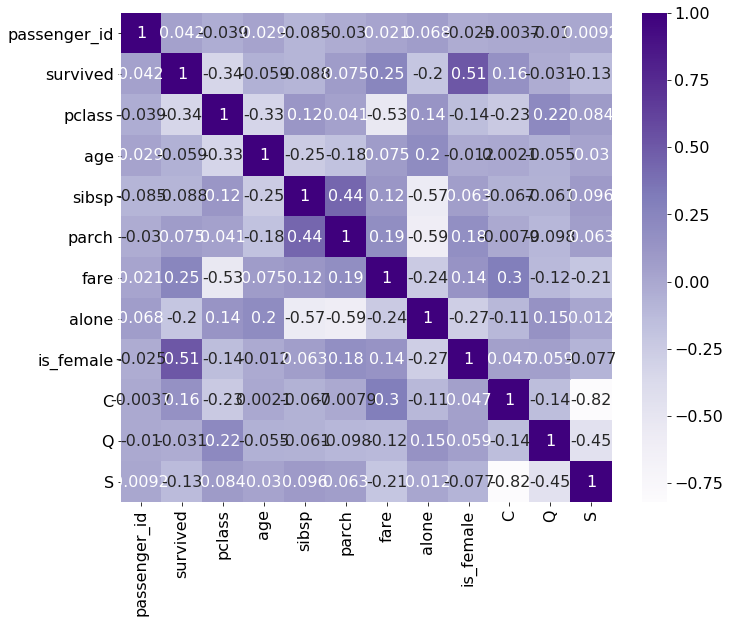

In [52]:
# based on this, my features for my Logitstic Regression:
# pclass, fare, alone, and is_female

sns.heatmap(train.corr(), annot=True, cmap='Purples')

plt.show()

In [53]:
r, p = stats.pearsonr(train['pclass'], train['is_female'])
print(f'pclass and is_female have a pearson r score of {r:.2%} and a p-value of {p:.3}.')

pclass and is_female have a pearson r score of -14.01% and a p-value of 0.00167.


In [54]:
r, p = stats.pearsonr(train['pclass'], train['fare'])
print(f'pclass and fare have a pearson r score of {r:.2%} and a p-value of {p:.3}.')

pclass and fare have a pearson r score of -52.55% and a p-value of 6.48e-37.


In [55]:
r, p = stats.pearsonr(train['fare'], train['is_female'])
print(f'fare and is_female have a pearson r score of {r:.2%} and a p-value of {p:.3}.')

fare and is_female have a pearson r score of 14.05% and a p-value of 0.00162.


## Split in and X and y DataFrames

In [56]:
X_train = train[['pclass', 'is_female', 'alone']]
y_train = train[['survived']]
X_validate = validate[['pclass', 'is_female', 'alone']]
y_validate = validate[['survived']]
X_test = test[['pclass', 'is_female', 'alone']]
y_test = test[['survived']]

## Baseline and First Logit Model

In [57]:
# My baseline if I predict survived positively every time would be 39%

train.survived.value_counts(normalize=True)

0    0.612774
1    0.387226
Name: survived, dtype: float64

In [58]:
logit = LogisticRegression(random_state=123)
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluate First Logit Model

In [59]:
eval_df = train[['survived']].rename(columns={'survived': 'actual'})
eval_df['yhat'] = logit.predict(X_train)
eval_df['probs'] = logit.predict_proba(X_train)[:, 1]
eval_df.head()

,actual,yhat,probs
669,1,1,0.896781
54,0,0,0.488617
16,0,0,0.139777
533,1,1,0.596369
125,1,0,0.139777


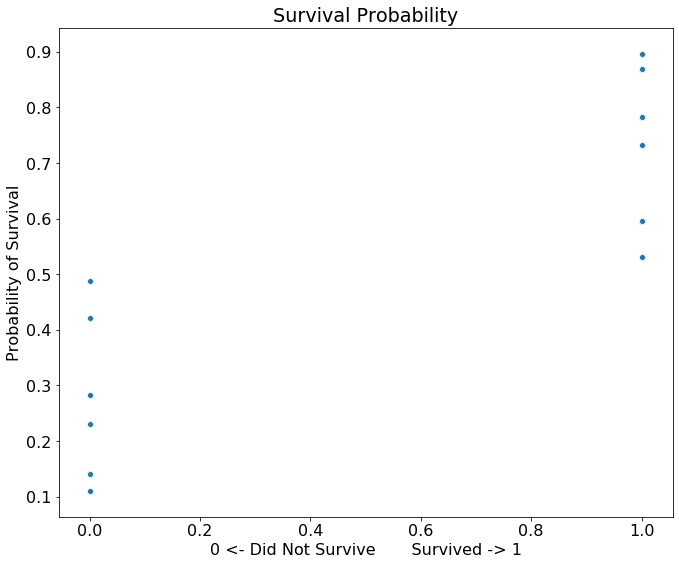

In [60]:
sns.scatterplot('yhat', 'probs', data=eval_df)

plt.ylabel('Probability of Survival')
plt.xlabel('0 <- Did Not Survive       Survived -> 1')
plt.title('Survival Probability')
plt.show()

### I have already beat my baseline by almost 20%. 

- First, I will look at my model score, confusion matrix and classificaiton report.


- Then, I will label my accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score and support.

In [61]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.77


In [66]:
# Another way to do Confusion Matrices

# labels = sorted(y_train.survived.unique())
# predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(eval_df.actual, eval_df.yhat), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> dtype('<U21')

In [73]:
pd.crosstab(eval_df.actual, eval_df.yhat, 
            rownames=['Actual'], 
            colnames=['Predicted'], margins=False, margins_name="Total")

Predicted,0,1
Actual,,
0,254,53
1,62,132


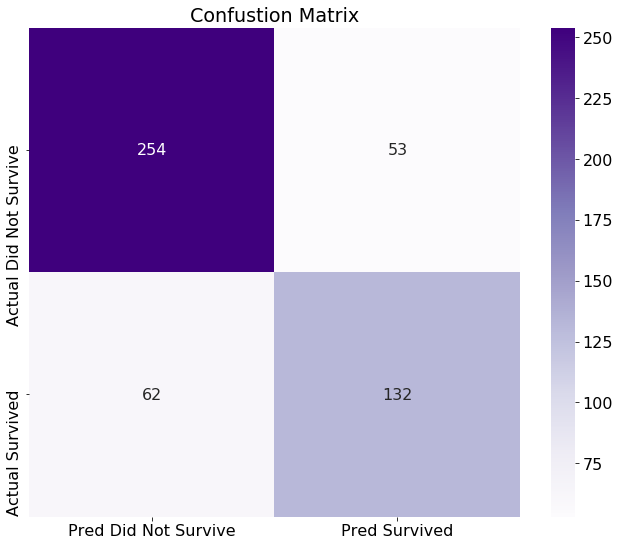

In [74]:
cm = confusion_matrix(eval_df.actual, eval_df.yhat)
sns.heatmap(cm, annot=True, fmt="d", cmap='Purples', yticklabels=['Actual Did Not Survive', 'Actual Survived'], xticklabels=['Pred Did Not Survive', 'Pred Survived'])

plt.title('Confustion Matrix')
plt.show()

In [64]:
# What a pretty way to do this! Thanks, Ryan!

pd.DataFrame(classification_report(eval_df.actual, eval_df.yhat, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.803797,0.713514,0.770459,0.758655,0.768837
recall,0.827362,0.680412,0.770459,0.753887,0.770459
f1-score,0.815409,0.696570,0.770459,0.755990,0.769392
support,307.000000,194.000000,0.770459,501.000000,501.000000


- My model is predicting survival accurately 77% of the time.


- My model's **Recall score is 68% for positives** which means that it is  catching the positives or observations positive for `survived` 68%  of the time.  (132/194) In other words, 68% of the time, my model is finding the relevant cases. This means that my model is missing 32% of relevant cases by Falsely classifying them as Negatives.


- My model's **Precision score is 71% for positives** which means that my model is correct in its positive predictions 71% of the time. 29% of the time, its positive predictions are incorrect because my model is Falsely classifying them as Positives.


- It seems that the model is better at predicting observations that are negative for `survived` than positive.

## Use Model with Validate Dataset

In [37]:
eval_df = validate[['survived']].rename(columns={'survived': 'actual'})
eval_df['yhat'] = logit.predict(X_validate)
eval_df['probs'] = logit.predict_proba(X_validate)[:, 1]
eval_df.head()

,actual,yhat,probs
371,0,0,0.139777
57,0,0,0.110407
398,0,0,0.231336
376,1,1,0.530192
194,1,1,0.869042


In [38]:
print('Accuracy of Logistic Regression classifier on validate set: {:.2f}'
     .format(logit.score(X_validate, y_validate)))

Accuracy of Logistic Regression classifier on validate set: 0.86


In [39]:
print(classification_report(eval_df.actual, eval_df.yhat))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90       105
           1       0.88      0.73      0.80        62

    accuracy                           0.86       167
   macro avg       0.87      0.83      0.85       167
weighted avg       0.86      0.86      0.86       167



### The model is performing better on the validate dataset

## Use my model with the Test dataset

In [40]:
eval_df = test[['survived']].rename(columns={'survived': 'actual'})
eval_df['yhat'] = logit.predict(X_test)
eval_df['probs'] = logit.predict_proba(X_test)[:, 1]
eval_df.head()

,actual,yhat,probs
114,0,1,0.530192
75,0,0,0.110407
52,1,1,0.896781
192,1,1,0.596369
575,0,0,0.110407


In [41]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.77


In [42]:
print(classification_report(eval_df.actual, eval_df.yhat))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       137
           1       0.72      0.65      0.68        86

    accuracy                           0.77       223
   macro avg       0.76      0.75      0.75       223
weighted avg       0.76      0.77      0.76       223



### The model is the same for accuracy, but it is missing more of our positives for `survived` as we can see from the Recall score down to 65%.